In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #统计绘图 

from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats  #统计

import warnings
warnings.filterwarnings('ignore')
#画图直接显示
%matplotlib inline  

In [4]:
#bring in the six packs
df_train = pd.read_csv('G:Machine learning\\kaggel\\house prices\\train.csv')
df_test = pd.read_csv('G:Machine learning\\kaggel\\house prices\\test.csv')

In [5]:
#check the decoration
#数据.columns 各列名称 分析有哪些数据，可以将数据分为numerical (数值型)和categorical(类别型)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#describe函数用来数据的快速统计汇总
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

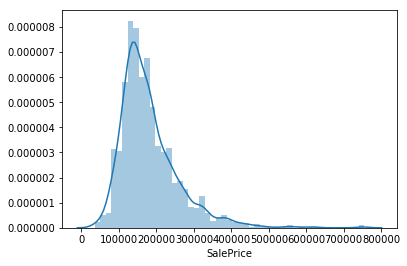

In [7]:
#seaborn 用法  https://zhuanlan.zhihu.com/p/24464836
#seaborn的displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，
#增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途

sns.distplot(df_train['SalePrice'])

In [8]:
#show skewness and Kurtosis  偏态和峰度
print("Skewness : %f " % df_train['SalePrice'].skew())
print("Kurtosis : %f " % df_train['SalePrice'].kurt())
                                  

Skewness : 1.882876 
Kurtosis : 6.536282 


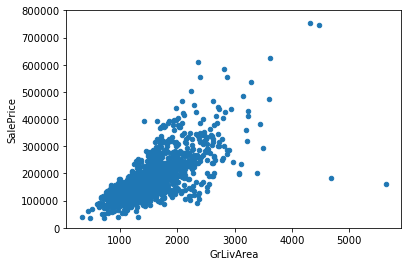

In [9]:
#scatter plot  Grlivearea / SalePrice

var = 'GrLivArea'
#pd.concat 函数 可以将数据根据不同的轴作简单的融合 axis = 0-->代表行  axis = 1 --> 代表列

data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim = (0,800000));

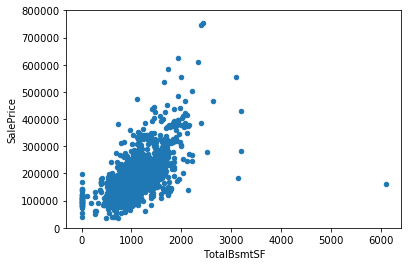

In [10]:
#scatter plot saleprice / totalbsmtsf
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim = (0,800000))

(-0.5, 9.5, 0, 800000)

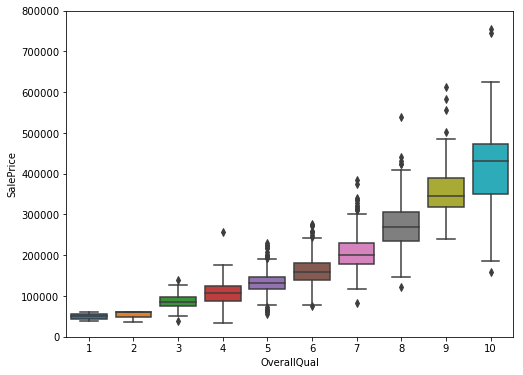

In [11]:
#box plot overallqual / saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis = 1)
f,ax = plt.subplots(figsize = (8,6)) #subplots 创建一个画像(figure)和一组子图(subplots)。 
fig = sns.boxplot(x = var,y = 'SalePrice',data = data)
fig.axis (ymin = 0,ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

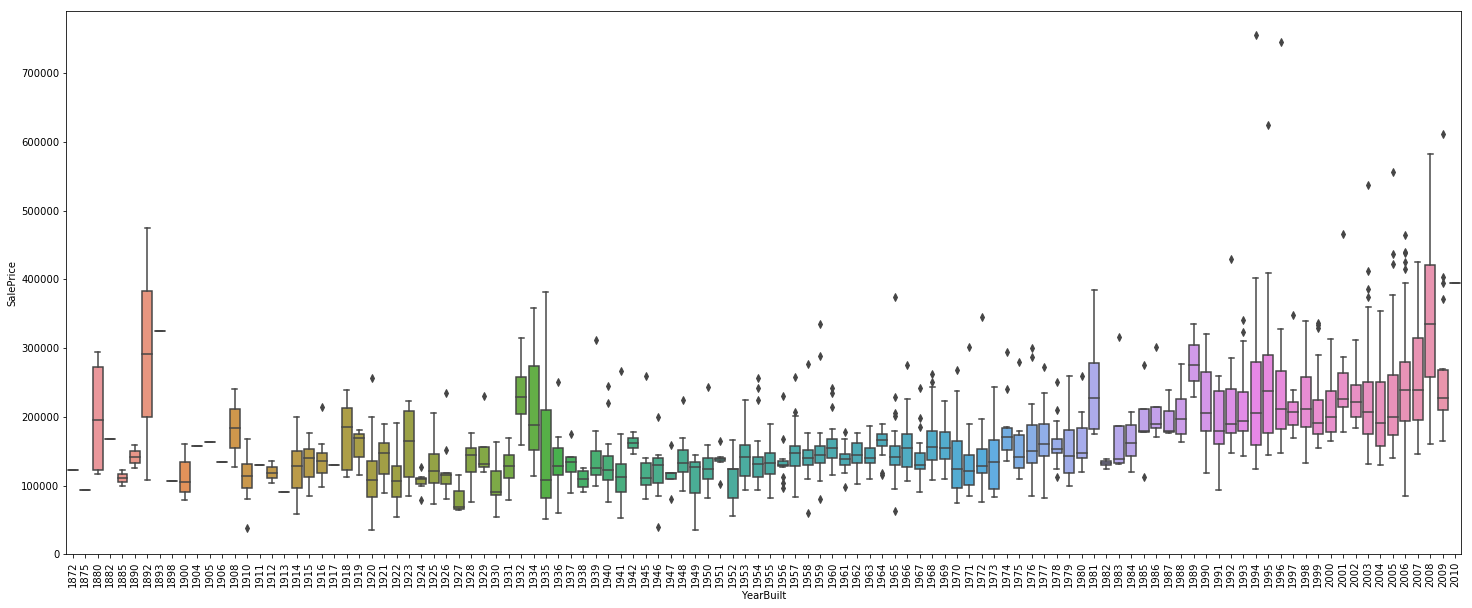

In [12]:
#boxplot saleprice / yearbuilt
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis = 1)
f, ax = plt.subplots(figsize = (25,10))
fig = sns.boxplot(x = var,y = 'SalePrice',data = data)
fig.axis(ymin = 0,yamx = 800000)
plt.xticks(rotation = 90) #x轴标签 转90度

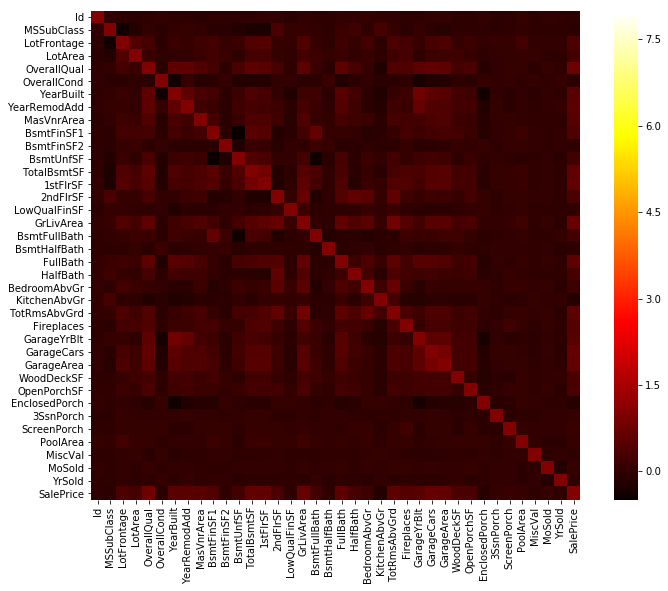

In [13]:
#correlation matrix  相关矩阵
corrmat = df_train.corr()
f ,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = 8,square = True,cmap = 'hot')

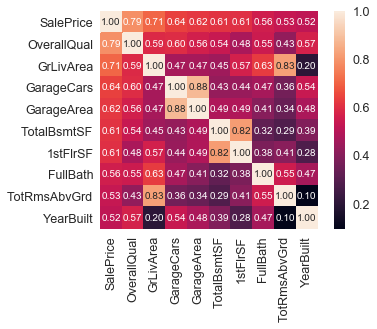

In [14]:
#saleprice correlation matrix
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index  #取出与saleprice相关性最大的十项
cm = np.corrcoef(df_train[cols].values.T)  #相关系数 
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm,cbar = True,annot = True,square = True ,fmt = '.2f',annot_kws = {'size': 10},yticklabels = cols.values,xticklabels = cols.values)
plt.show()

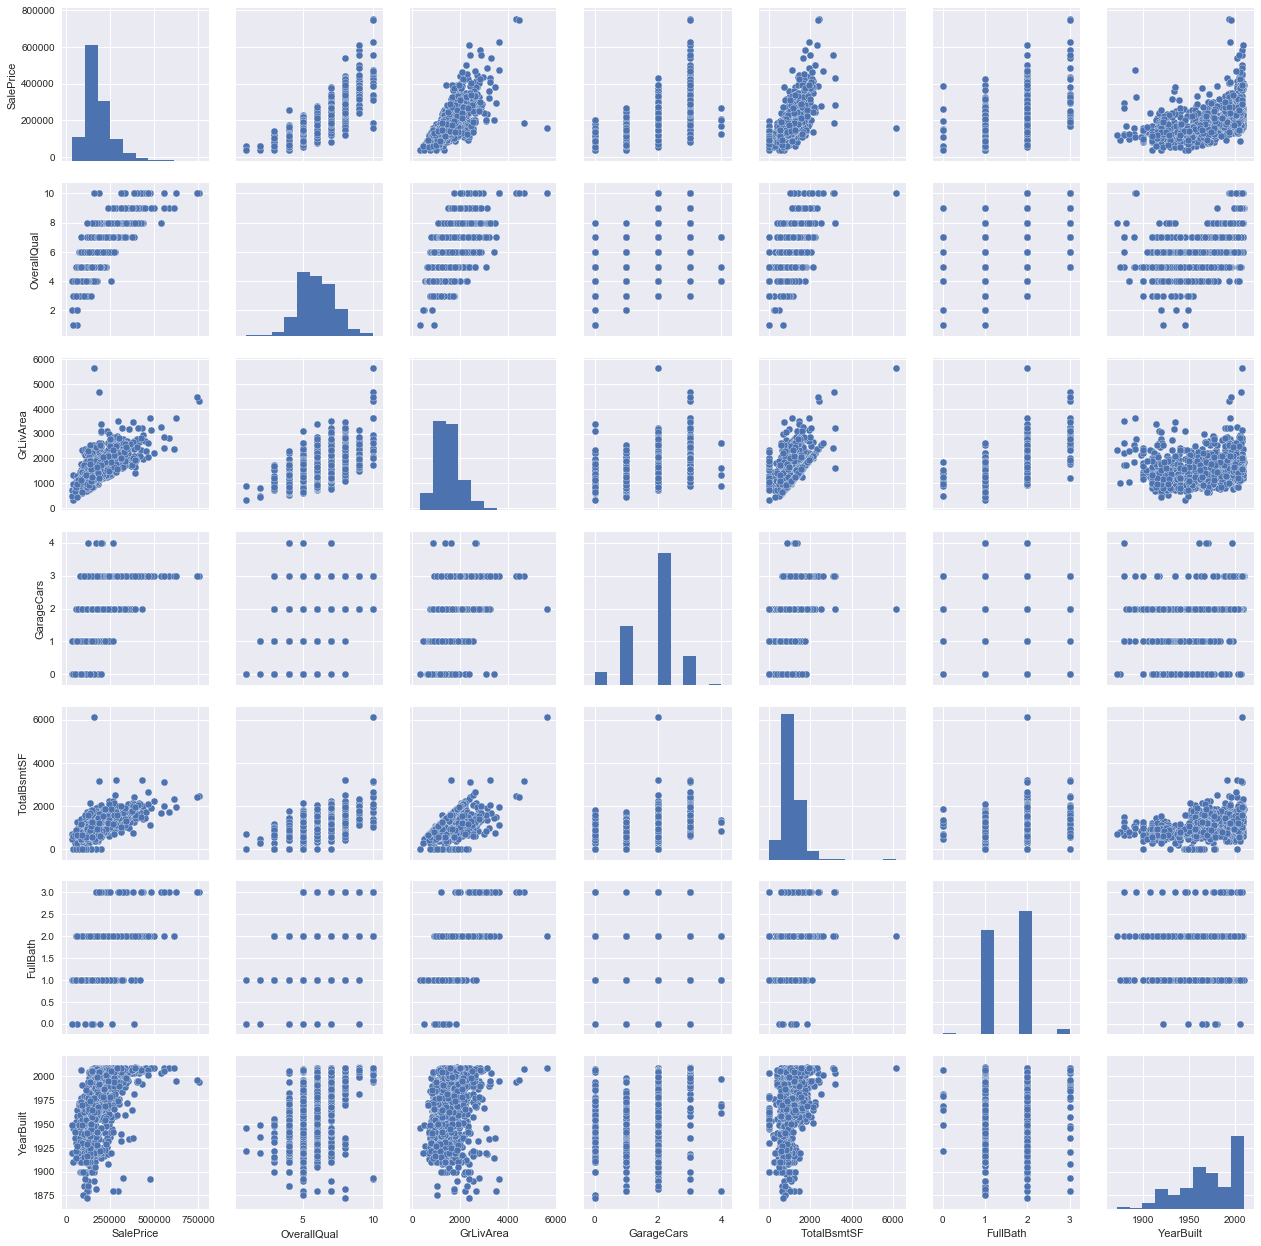

In [15]:
#scatterplot 
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size = 2.5)



In [16]:
#missing data
#pandas.isnull() 判断数据是否为空 返回false / true
#sort_values()
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [17]:
df_train = df_train.drop(missing_data[(missing_data['Total'] > 1)].index,axis = 1)


In [18]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [19]:
df_train.isnull().sum().max()

0

outer range(low) of the distribution : 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution : 
 [[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


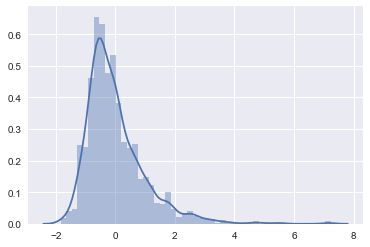

In [20]:
#standardizing data --> converting data  values to have mean of 0 and standard deviation of 1 
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# fit : compute mean and std deviation 
#transform : Perform standardization by centering and scaling
#np.newaxis 增加新维度
#argsort() Returns the indices that would sort an array.将x中的元素从小到大排列，提取其对应的index(索引)，然后输出
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range(low) of the distribution :','\n',low_range)
print ('outer range (high) of the distribution :','\n',high_range)
sns.distplot(saleprice_scaled)

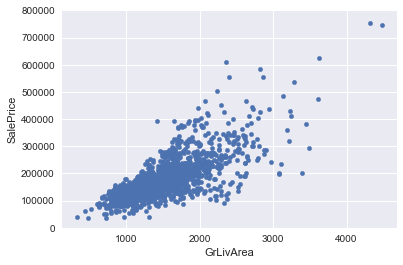

In [21]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim =(0,800000))

In [ ]:
#delete point
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299 ].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)


# 5 Getting hard core

According to Hair et al. (2013), four assumptions should be tested:

Normality (正态性)- When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity（方差齐性） - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity（线性）- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors （无相关错误） - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

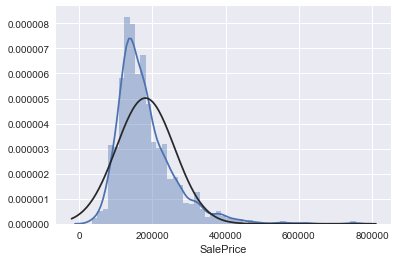

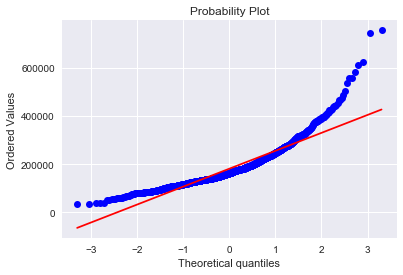

In [22]:
# in the search for normality
#histogram and normal probability plot  直方图和正态概率图
sns.distplot(df_train['SalePrice'],fit = norm) #fit 控制拟合的参数分布图形
fig = plt.figure()
# probplot :Calculate quantiles for a probability plot, and optionally show the plot. 计算概率图的分位数
res = stats.probplot(df_train['SalePrice'],plot = plt)

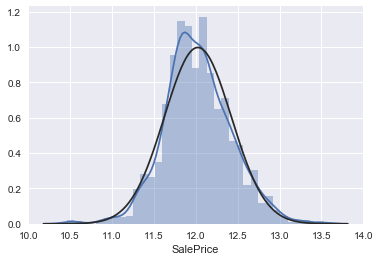

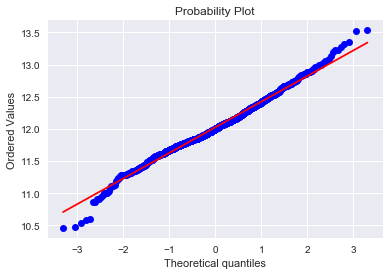

In [23]:
# in case of positive skewness, log transformations usually works well. 
#直方图看出不是正态分布，有poistive skewness(正偏态 高峰偏左)---> log transformation 
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'],fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot = plt)

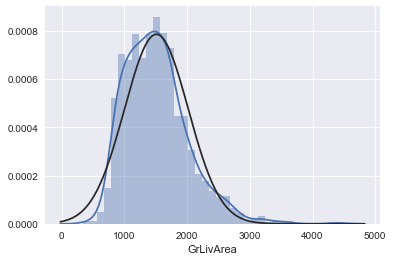

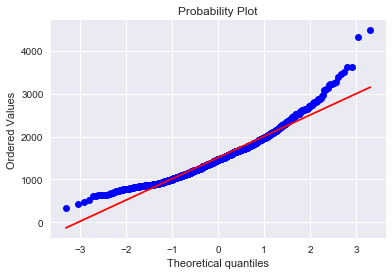

In [24]:
# check GrLivArea
sns.distplot(df_train['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot = plt)

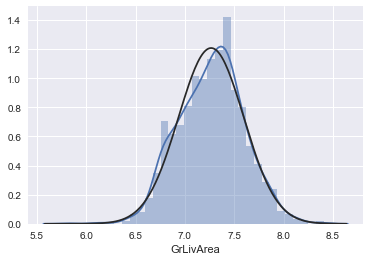

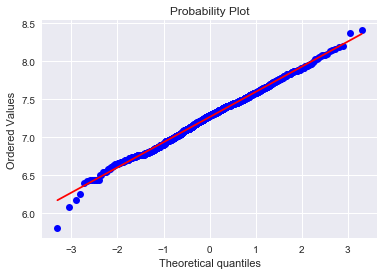

In [25]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'],fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot = plt)

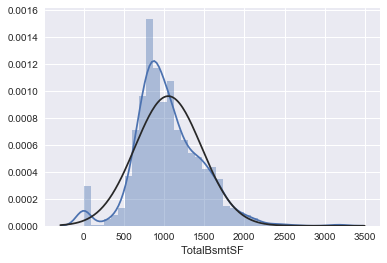

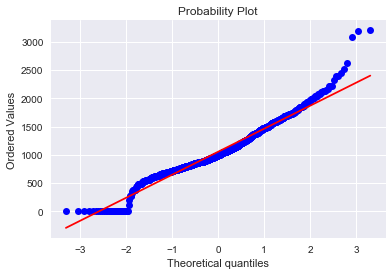

In [26]:
#TotalBsmtSF 
sns.distplot(df_train['TotalBsmtSF'],fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'],plot = plt)

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [27]:
#create column for new varible 
#if area > 0 ,it gets 1; for area == 0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index = df_train.index)
df_train['HasBsmt']  = 0
df_train.loc[df_train['TotalBsmtSF'] > 0 ,'HasBsmt'] = 1
df_train.loc[df_train['HasBsmt'] == 0 ,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

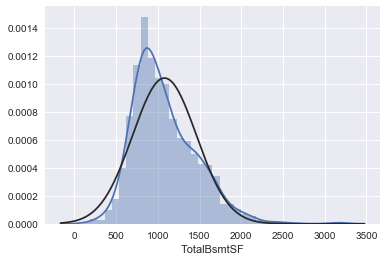

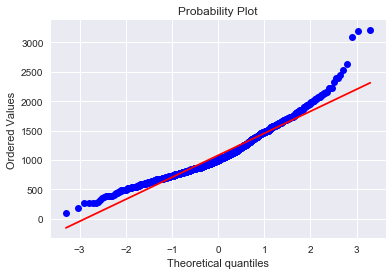

In [28]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0 ]['TotalBsmtSF'],plot = plt)

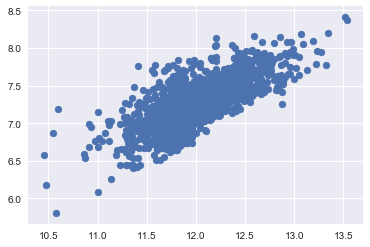

In [29]:
#scatter plot
plt.scatter(df_train['SalePrice'],df_train['GrLivArea'])

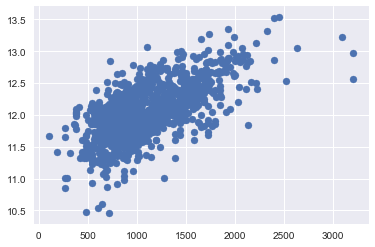

In [30]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0] ['TotalBsmtSF'],df_train[df_train['TotalBsmtSF'] > 0] 
['SalePrice'])

In [32]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0
